<a href="https://colab.research.google.com/github/alouwyck/vives-deep-learning/blob/main/topic8/Chollet_HFST8_Oefeningen.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

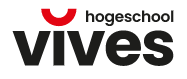<br>


**DEEP LEARNING**<br>
Academiejaar 2022-2023<br>
Andy Louwyck

---



---



# 8. Introduction to deep learning for computer vision

Hoofdstuk 8 uit het boek "Deep Learning with Python" (2e editie) van François Chollet

## 8.1. Introduction to convnets

### 8.1.0. MNIST example

In [ ]:
from tensorflow.keras.datasets import mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype("float32") / 255
test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype("float32") / 255

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers

inputs = keras.Input(shape=(28, 28, 1))
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(inputs)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
outputs = layers.Dense(10, activation="softmax")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

In [ ]:
model.summary()

In [ ]:
model.compile(
    optimizer="rmsprop",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)
model.fit(train_images, train_labels, epochs=5, batch_size=64)

In [ ]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"Test accuracy: {test_acc:.3f}")

### 8.1.1. The convolution operation

Voorbeeld komt uit: https://medium.com/apache-mxnet/multi-channel-convolutions-explained-with-ms-excel-9bbf8eb77108

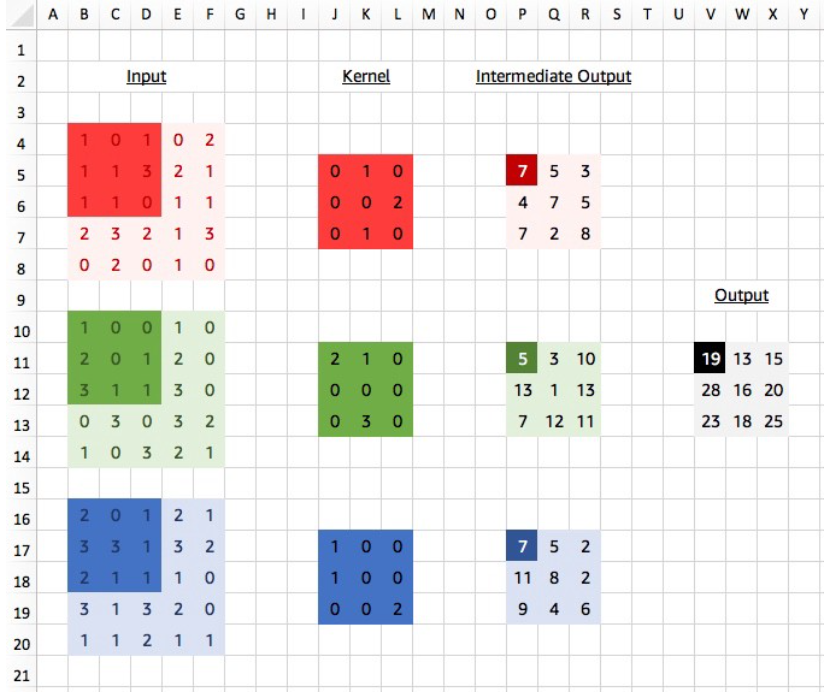

In [ ]:
import numpy as np

In [ ]:
Input = [[[1, 0, 1, 0, 2],
          [1, 1, 3, 2, 1],
          [1, 1, 0, 1, 1],
          [2, 3, 2, 1, 3],
          [0, 2, 0, 1, 0]],
         [[1, 0, 0, 1, 0],
          [2, 0, 1, 2, 0],
          [3, 1, 1, 3, 0],
          [0, 3, 0, 3, 2],
          [1, 0, 3, 2, 1]],
         [[2, 0, 1, 2, 1],
          [3, 3, 1, 3, 2],
          [2, 1, 1, 1, 0],
          [3, 1, 3, 2, 0],
          [1, 1, 2, 1, 1]]]
Input = np.asarray(Input)
Input

array([[[1, 0, 1, 0, 2],
        [1, 1, 3, 2, 1],
        [1, 1, 0, 1, 1],
        [2, 3, 2, 1, 3],
        [0, 2, 0, 1, 0]],

       [[1, 0, 0, 1, 0],
        [2, 0, 1, 2, 0],
        [3, 1, 1, 3, 0],
        [0, 3, 0, 3, 2],
        [1, 0, 3, 2, 1]],

       [[2, 0, 1, 2, 1],
        [3, 3, 1, 3, 2],
        [2, 1, 1, 1, 0],
        [3, 1, 3, 2, 0],
        [1, 1, 2, 1, 1]]])

In [ ]:
Kernel = [[[0, 1, 0],
           [0, 0, 2],
           [0, 1, 0]],
          [[2, 1, 0],
           [0, 0, 0],
           [0, 3, 0]],
          [[1, 0, 0],
           [1, 0, 0],
           [0, 0, 2]]]
Kernel = np.asarray(Kernel)
Kernel

array([[[0, 1, 0],
        [0, 0, 2],
        [0, 1, 0]],

       [[2, 1, 0],
        [0, 0, 0],
        [0, 3, 0]],

       [[1, 0, 0],
        [1, 0, 0],
        [0, 0, 2]]])

**Oefening**: Pas convolutie toe. Schrijf generieke code. Gebruik dus variabelen!

**Oefening**: Pas dezelfde convolutie toe maar maak nu gebruik van zero padding zodat de output array dezelfde shape heeft als de input array.

**Oefening**: Schrijf nu een generieke functie `convolution` die convolutie toepast op een gegeven tensor met een gegeven kernel. Stel inputparameter `stride` default gelijk aan `1` en inputparameter `padding` default aan `False`.

### 8.1.2. The max-pooling operation

In [ ]:
import numpy as np

In [ ]:
Input = [[[1, 0, 1, 0, 2],
          [1, 1, 3, 2, 1],
          [1, 1, 0, 1, 1],
          [2, 3, 2, 1, 3],
          [0, 2, 0, 1, 0]],
         [[1, 0, 0, 1, 0],
          [2, 0, 1, 2, 0],
          [3, 1, 1, 3, 0],
          [0, 3, 0, 3, 2],
          [1, 0, 3, 2, 1]],
         [[2, 0, 1, 2, 1],
          [3, 3, 1, 3, 2],
          [2, 1, 1, 1, 0],
          [3, 1, 3, 2, 0],
          [1, 1, 2, 1, 1]]]
Input = np.asarray(Input)
Input

array([[[1, 0, 1, 0, 2],
        [1, 1, 3, 2, 1],
        [1, 1, 0, 1, 1],
        [2, 3, 2, 1, 3],
        [0, 2, 0, 1, 0]],

       [[1, 0, 0, 1, 0],
        [2, 0, 1, 2, 0],
        [3, 1, 1, 3, 0],
        [0, 3, 0, 3, 2],
        [1, 0, 3, 2, 1]],

       [[2, 0, 1, 2, 1],
        [3, 3, 1, 3, 2],
        [2, 1, 1, 1, 0],
        [3, 1, 3, 2, 0],
        [1, 1, 2, 1, 1]]])

**Oefening**: Pas max-pooling toe met een venster van 2 x 2. Schrijf generieke code. Gebruik dus variabelen!

**Oefening**: Pas average-pooling toe met een venster van 3 x 3 en stride = 2. Schrijf generieke code. Gebruik dus variabelen!

**Oefening**: Schrijf nu een generieke functie `pooling` die max of average pooling toepast op een gegeven tensor.